In [1]:
import os
import shutil
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import normaltest
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf

Download Housing Data from GitHub Store Housing Data as 'YingshiHuang_RunjiaShe_final_project.csv'

In [2]:
directory = 'YingshiHuang_RunjiaShe'
cwd = os.getcwd()
path = os.path.join(cwd, directory)
os.mkdir(path)
os. chdir(path)

In [3]:
url = 'https://raw.githubusercontent.com/bursteinalan/Data-Sets/master/Housing/House%20Prediction%20Data.csv'
r = requests.get(url, allow_redirects=True)
open('final_project.csv', 'wb').write(r.content)
df = pd.read_csv('final_project.csv')

# Method (IQR1-IQR3)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [5]:
df['YearUsed'] = df['YrSold'] - df['YearBuilt']
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YearUsed
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,31
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,7
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,91
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,8


In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df.shape

(2919, 82)

Factors might affect the SalePrice
YrdSold, YearBuilt, LotArea

In [8]:
df1 = pd.DataFrame(columns = ['Street','SalePrice','GrLivArea','YearUsed'], data = df)
df1

,Street,SalePrice,GrLivArea,YearUsed
0,Pave,208500.0,1710,5
1,Pave,181500.0,1262,31
2,Pave,223500.0,1786,7
3,Pave,140000.0,1717,91
4,Pave,250000.0,2198,8
...,...,...,...,...
2914,Pave,NaN,1092,36
2915,Pave,NaN,1092,36
2916,Pave,NaN,1224,46
2917,Pave,NaN,970,14


Drop all the N/A so that the arrays are clear and ready to process 

In [9]:
df1 = df1.dropna(how='any',axis=0)
df1.describe()

,SalePrice,GrLivArea,YearUsed
count,1460.000000,1460.000000,1460.000000
mean,180921.195890,1515.463699,36.547945
std,79442.502883,525.480383,30.250152
min,34900.000000,334.000000,0.000000
25%,129975.000000,1129.500000,8.000000
50%,163000.000000,1464.000000,35.000000
75%,214000.000000,1776.750000,54.000000
max,755000.000000,5642.000000,136.000000


Calculate the correlation so that it is clear to see the relationship of x_value and y_value

In [10]:
df1.corr()

,SalePrice,GrLivArea,YearUsed
SalePrice,1.000000,0.708624,-0.523350
GrLivArea,0.708624,1.000000,-0.200302
YearUsed,-0.523350,-0.200302,1.000000


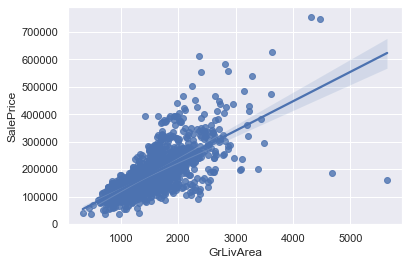

In [11]:
sns.set_theme(style="darkgrid")
plt.figure()
sns.regplot(x='GrLivArea', y='SalePrice', data=df1, color='b',order=1.5)
new_name = 'GrLivArea_SalePrice'
plt.savefig(new_name + '.png', bbox_inches='tight')

In [12]:
df1_Pave = df1.loc[df1['Street'] == 'Pave']
df1_Pave = df1_Pave.loc[df1_Pave['GrLivArea'] < 1777]
df1_Pave = df1_Pave.loc[df1_Pave['GrLivArea'] > 1129]
df1_Pave = df1_Pave.loc[df1_Pave['YearUsed'] < 54]
df1_Pave = df1_Pave.loc[df1_Pave['YearUsed'] > 8]

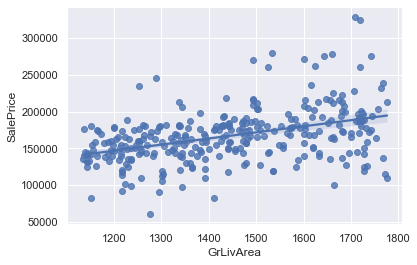

In [13]:
plt.figure()
sns.regplot(x='GrLivArea', y='SalePrice', data=df1_Pave, color='b',order=1.5)
new_name = 'GrLivArea_SalePrice_ONLY_PAVE'
plt.savefig(new_name + '.png', bbox_inches='tight')

In [14]:
X = np.array(df1_Pave['YearUsed']).reshape(-1, 1)
y = np.array(df1_Pave['SalePrice']).reshape(-1, 1)
X_seq = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

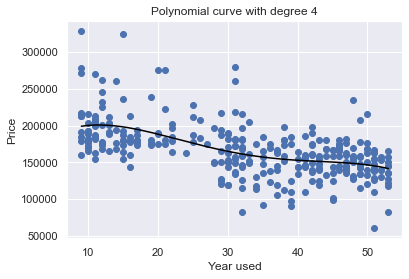

In [15]:
degree = 4
polyreg = make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X,y)
plt.figure()
plt.scatter(X,y)
plt.plot(X_seq,polyreg.predict(X_seq),color="black")
plt.title("Polynomial curve with degree "+str(degree))
plt.xlabel('Year used')
plt.ylabel('Price')
plt.xlim(7,55)
new_name = 'Polynomial_curve_with_degree_Year_used_VS_SalePrice_ONLY_PAVE'
plt.savefig(new_name + '.png', bbox_inches='tight')

# METHOD Drop Outliers with the 2 standard deviations from broundry

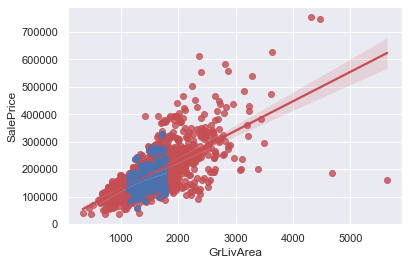

In [16]:
sns.set_theme(style="darkgrid")
plt.figure()
sns.regplot(x='GrLivArea', y='SalePrice', data=df1, color='r',order=1.5)
sns.regplot(x='GrLivArea', y='SalePrice', data=df1_Pave, color='b',order=1.5)
new_name = 'GrLivArear_VS_SalePrice__Original_Filtered'
plt.savefig(new_name + '.png', bbox_inches='tight')

Drop off the NULL values

In [17]:
df2_year_built = df[['YearBuilt', 'SalePrice']].dropna()

Set Year Built as independent values Set SalePrice as dependent values

In [18]:
x_value = df2_year_built['YearBuilt']
y_value = df2_year_built['SalePrice']
x_orig = df2_year_built['YearBuilt']
y_orig = df2_year_built['SalePrice']

According to the shape of scatter pointers It is closer to Polynomial Regression Curve fit rather than Linear Regression

In [19]:
df2_year_built.describe()

,YearBuilt,SalePrice
count,1460.000000,1460.000000
mean,1971.267808,180921.195890
std,30.202904,79442.502883
min,1872.000000,34900.000000
25%,1954.000000,129975.000000
50%,1973.000000,163000.000000
75%,2000.000000,214000.000000
max,2010.000000,755000.000000


min is the oldest house YearBuilt = 1872 max is the newest house YearBuilt = 2010
numpy.polyfit (X, Y, deg, rcond=None, full=False, w=None, cov=False) 
Return Value It returns a ndarray
y = a0 + a1x + a2x^2 + … + anx^n 
calculating value of coefficient in case of cubic polynomial 
numpy.polyfit = a0 + a1x + a2x^2 + a3x^3

In [20]:
polynomial_degree_3 = np.polyfit(x_value, y_value, 3)
polynomial_degree_3

array([ 8.92851052e-02, -5.01672131e+02,  9.38656738e+05, -5.84675974e+08])

np.poly1d([1, 2, 3]) 1 * x_to_2 + 2 * x_to_1 + 3 * x_to_0 
Construct the polynomial: 
    p = np.poly1d([1, 2, 3]) 
    print(np.poly1d(p)) 
Evaluate the polynomial at: 
    p(0.5) =1 * 0.25 + 2 * 0.5 + 3 * 1 4.25

In [21]:
polynomial_degree_3_model = np.poly1d(polynomial_degree_3)

numpy.linspace(start, stop, num = 50, endpoint = True, retstep = False, dtype = None) 
-> start : [optional] start of interval range. By default start = 0 
-> stop : end of interval range 
-> restep : If True, return (samples, step). By deflut restep = False 
-> num : [int, optional] No. of samples to generate 
-> dtype : type of output array
start = the oldest 1872 
end = the newest 2010 
num = end - start = 138

In [22]:
polynomial_degree_3_line = np.linspace(1872, 2010, num=138)

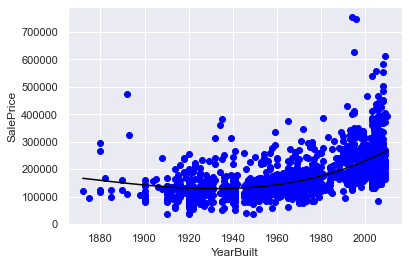

In [23]:
plt.figure()
plt.scatter(x_value, y_value, color='blue')
plt.plot(polynomial_degree_3_line, polynomial_degree_3_model(polynomial_degree_3_line), color='black')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
new_name = 'YearBuilt_SalePrice_scatter_polynomial_3'
plt.savefig(new_name + '.png', bbox_inches='tight')

In [24]:
def reject_outliers(data, m=2):
    return pd.DataFrame(data[abs(data - np.mean(data)) < m * np.std(data)])

In [25]:
df2_no_outliers = reject_outliers(df2_year_built)

/Users/huangyin/PycharmProjects/pythonProject1/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [26]:
df2_drop_na = df2_no_outliers[~(np.isnan(df2_no_outliers).any(axis=1))]

In [27]:
df2_drop_na.describe()

,YearBuilt,SalePrice
count,1351.000000,1351.000000
mean,1972.433753,171279.890452
std,27.423642,58665.469121
min,1911.000000,34900.000000
25%,1955.000000,130000.000000
50%,1972.000000,160000.000000
75%,2000.000000,205000.000000
max,2009.000000,339750.000000


In [28]:
x_value = df2_drop_na['YearBuilt']
y_value = df2_drop_na['SalePrice']

In [29]:
polynomial_degree_3 = np.polyfit(x_value, y_value, 3)
polynomial_degree_3_nooutliers_model = np.poly1d(polynomial_degree_3)
polynomial_degree_3_nooutliers_line = np.linspace(1911, 2009, num=98)

The shape of the housing data without outliers is also seem to fit by using linear regression
values converts it into a numpy array -1 means that calculate the dimension of rows, but have 1 column create object for the class perform linear regression make predictions from the x_value so that it is ordered x_value do not need to be changing, because it is independent

In [30]:
x_value = df2_drop_na.iloc[:, 0].values.reshape(-1, 1)
y_value = df2_drop_na.iloc[:, 1].values.reshape(-1, 1)

In [31]:
linear_regressor = LinearRegression()
linear_regressor.fit(x_value, y_value)
Y_predict = linear_regressor.predict(x_value)

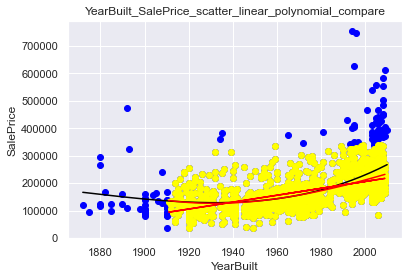

In [32]:
plt.figure()
plt.scatter(x_orig,y_orig,color='blue')
plt.plot(polynomial_degree_3_line, polynomial_degree_3_model(polynomial_degree_3_line), color='black')
plt.scatter(x_value, y_value, color='yellow')
plt.plot(polynomial_degree_3_nooutliers_line, polynomial_degree_3_nooutliers_model(polynomial_degree_3_nooutliers_line), color='red')
plt.plot(x_value, Y_predict, color='red')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.title('YearBuilt_SalePrice_scatter_linear_polynomial_compare')
new_name = 'YearBuilt_SalePrice_scatter_linear_polynomial_compare'
plt.savefig(new_name + '.png', bbox_inches='tight')

x_value and y_value have to update, because the N/A cells are different every time data reorganize

In [33]:
df2_lot_area = df[['GrLivArea', 'SalePrice']].dropna()

In [34]:
x_value = df2_lot_area['GrLivArea']
y_value = df2_lot_area['SalePrice']
x_orig = df2_lot_area['GrLivArea']
y_orig = df2_lot_area['SalePrice']

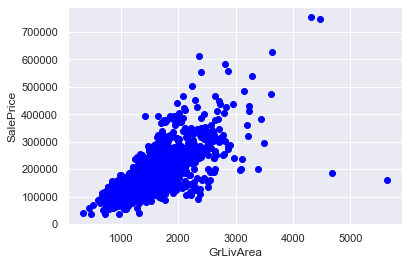

In [35]:
plt.scatter(x_value, y_value, color='blue')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
new_name = 'GrLivArea_SalePrice'
plt.savefig(new_name + '.png', bbox_inches='tight')

According to the shape of scatter pointers It is closer to linear regression

In [36]:
df2_lot_area = reject_outliers(df2_lot_area)
df2_lot_area_no_outliers = df2_lot_area[~(np.isnan(df2_lot_area).any(axis=1))]
df2_lot_area_no_outliers.describe()

/Users/huangyin/PycharmProjects/pythonProject1/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,GrLivArea,SalePrice
count,1362.000000,1362.000000
mean,1438.822320,167938.889134
std,413.158714,57183.860937
min,480.000000,34900.000000
25%,1113.250000,128275.000000
50%,1425.500000,157700.000000
75%,1711.500000,200000.000000
max,2555.000000,339750.000000


In [37]:
x_value = df2_lot_area_no_outliers['GrLivArea']
y_value = df2_lot_area_no_outliers['SalePrice']

In [38]:
polynomial_degree_2 = np.polyfit(x_value, y_value,2)
polynomial_degree_2_model = np.poly1d(polynomial_degree_2)
polynomial_degree_2_line = np.linspace(1300, 29959, num=28659)

In [39]:
x_value = df2_lot_area_no_outliers.iloc[:, 0].values.reshape(-1, 1)
y_value = df2_lot_area_no_outliers.iloc[:, 1].values.reshape(-1, 1)

In [40]:
linear_regressor = LinearRegression()
linear_regressor.fit(x_value, y_value)
Y_predict = linear_regressor.predict(x_value)

In [41]:
y_orig.max()

755000.0

In [42]:
x_orig.max()

5642

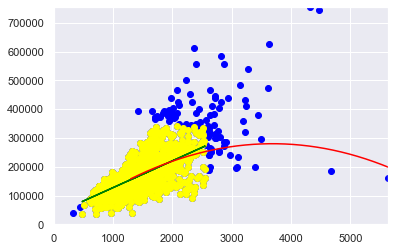

In [43]:
plt.figure()
ax = plt.gca()
ax.set_xlim([0,5642])
ax.set_ylim([0,755000])
plt.scatter(x_orig,y_orig,color='blue')
plt.scatter(x_value, y_value,color='yellow')
plt.plot(x_value, Y_predict, color='green')
plt.plot(polynomial_degree_2_line, polynomial_degree_2_model(polynomial_degree_2_line), color='red')
new_name = 'GrLivArea_SalePrice_Linear_Polynomial'
plt.savefig(new_name + '.png', bbox_inches='tight')

# Evaluate correlation
Get all the factors data which might affect the Sale price

In [44]:
df_dropna = df[['LotArea', 'LotShape', 'OverallCond', 'YearBuilt', 'Foundation', 'Electrical', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Functional', 'GarageCars', 'GarageArea', 'YrSold', 'SaleCondition', 'YearUsed', 'SalePrice']].dropna()

Get the correlation of how every factors correlative with each other.

In [45]:
df_cor = df_dropna.corr()

In practical, only correlation absolute value is higher than 0.4 have high influence.

In [46]:
df_cor[(df_cor < 0.4) & (df_cor > -0.4)] = np.NAN
df_cor.describe()

,LotArea,OverallCond,YearBuilt,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,GarageCars,GarageArea,YrSold,YearUsed,SalePrice
count,1.0,1.0,6.000000,7.000000,1.0,1.0,7.000000,2.000000,2.000000,1.0,7.000000,7.000000,1.0,6.000000,7.000000
mean,1.0,1.0,0.334921,0.601813,1.0,1.0,0.438085,0.708094,0.760655,1.0,0.494164,0.482929,1.0,-0.334917,0.504706
std,NaN,NaN,0.683670,0.203078,NaN,NaN,0.445692,0.412817,0.338485,NaN,0.499716,0.479590,NaN,0.683960,0.479685
min,1.0,1.0,-0.999035,0.416189,1.0,1.0,-0.468094,0.416189,0.521310,1.0,-0.538742,-0.479909,1.0,-0.999035,-0.523722
25%,1.0,1.0,0.470835,0.468146,1.0,1.0,0.436952,0.562142,0.640982,1.0,0.468470,0.437457,1.0,-0.534987,0.542077
50%,1.0,1.0,0.501366,0.521310,1.0,1.0,0.469619,0.708094,0.760655,1.0,0.537866,0.479460,1.0,-0.501816,0.623423
75%,1.0,1.0,0.534218,0.669450,1.0,1.0,0.595582,0.854047,0.880327,1.0,0.761543,0.753018,1.0,-0.471048,0.674545
max,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000


Only observe the row of Sale Price, ignore all the correlation absolute value lower than 0.4

In [47]:
high_cor = df_cor.loc['SalePrice'].dropna().drop('SalePrice')

Convert the all value into absolute but in separate name

In [48]:
abs_high_cor = abs(high_cor)

Plot all the factors as X, and all the response correlation as Y

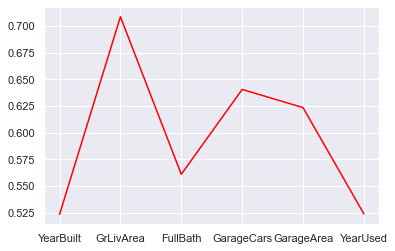

In [49]:
plt.figure()
plt.plot(abs_high_cor, color='red')
new_name = 'high_cor_hist_plot'
plt.savefig(new_name + '.png', bbox_inches='tight')

# Train, Test data by x_value = 'GrLivArea' y_value = 'SalePrice'

In [50]:
data_train_test = df[['YearBuilt','GrLivArea','FullBath','GarageCars','GarageArea','SalePrice']].dropna()

In [51]:
data_train_test

,YearBuilt,GrLivArea,FullBath,GarageCars,GarageArea,SalePrice
0,2003,1710,2,2.0,548.0,208500.0
1,1976,1262,2,2.0,460.0,181500.0
2,2001,1786,2,2.0,608.0,223500.0
3,1915,1717,1,3.0,642.0,140000.0
4,2000,2198,2,3.0,836.0,250000.0
...,...,...,...,...,...,...
1455,1999,1647,2,2.0,460.0,175000.0
1456,1978,2073,2,2.0,500.0,210000.0
1457,1941,2340,2,1.0,252.0,266500.0
1458,1950,1078,1,1.0,240.0,142125.0


In [52]:
cor_x_h = data_train_test[['GrLivArea']]

In [53]:
cor_y_h = data_train_test[['SalePrice']]

First training set use 80% of data to form the model
Second trainging set use 90% of data to form the model

In [54]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(cor_x_h,cor_y_h,test_size=0.2)
x_train2, x_test2, y_train2, y_test2 = train_test_split(cor_x_h,cor_y_h,test_size=0.1)

In [55]:
train_lr1 = LinearRegression()
train_lr1.fit(x_train1,y_train1)
test_predict1 = train_lr1.predict(x_test1)
test_predict1

array([[228898.99180012],
       [131031.91805796],
       [154162.26636887],
       [160227.55770373],
       [167218.06297102],
       [184077.51685098],
       [226431.75464695],
       [189011.9911573 ],
       [181404.67660171],
       [224992.53297427],
       [154059.46482082],
       [219852.45557185],
       [216048.79829405],
       [171124.52179687],
       [202376.19240361],
       [180787.86731342],
       [169274.09393199],
       [244524.82710349],
       [162489.19176079],
       [272692.45126877],
       [129592.69638528],
       [137097.20939282],
       [270636.4203078 ],
       [190862.41902218],
       [223039.30356135],
       [129901.10102942],
       [150153.00599497],
       [186133.54781194],
       [197030.51190508],
       [178320.63016026],
       [125583.43601139],
       [136788.80474867],
       [241749.18530618],
       [196722.10726094],
       [227973.77786768],
       [175956.19455514],
       [185825.1431678 ],
       [165470.4366542 ],
       [1178

In [56]:
train_lr2 = LinearRegression()
train_lr2.fit(x_train2,y_train2)
test_predict2 = train_lr2.predict(x_test2)
test_predict2

array([[326286.59770651],
       [111714.25290621],
       [120927.04454516],
       [176632.29631559],
       [154243.07012324],
       [193236.74636254],
       [154457.32109159],
       [142030.76492742],
       [165598.37144567],
       [131746.71844673],
       [206734.55736845],
       [202128.16154897],
       [196022.00895106],
       [183702.57827106],
       [148886.79591455],
       [201806.78509645],
       [197628.89121367],
       [188308.97409054],
       [166026.87338237],
       [143316.27073751],
       [202663.78896984],
       [156064.2033542 ],
       [172561.52791698],
       [111178.62548534],
       [130032.71069994],
       [179417.55890411],
       [145137.40396846],
       [150922.18011385],
       [177382.1747048 ],
       [269724.34206269],
       [124462.1855229 ],
       [281293.89435347],
       [162598.85788881],
       [260940.05236044],
       [157992.46206933],
       [179846.0608408 ],
       [146315.78429437],
       [229659.41098166],
       [1793

In [57]:
sort_y1 = y_test1.sort_values(by=['SalePrice'])
sort_y1

,SalePrice
30,40000.0
636,60000.0
1432,64500.0
614,75500.0
383,76000.0
...,...
515,402861.0
1373,466500.0
803,582933.0
898,611657.0


In [58]:
sort_y2 = y_test2.sort_values(by=['SalePrice'])
sort_y2

,SalePrice
1337,52500.0
329,78000.0
341,82000.0
976,85500.0
235,89500.0
...,...
1442,310000.0
159,320000.0
320,342643.0
336,377426.0


In [59]:
accuracy1 = train_lr1.score(x_test1,y_test1)
accuracy1

0.5464616496754384

In [60]:
accuracy2 = train_lr2.score(x_test2,y_test2)
accuracy2

0.5428342566239394

In [61]:
# plt.figure()
# plt.scatter(x_orig,y_orig,color='blue')
# plt.scatter(x_train, y_train,color='yellow')
# plt.plot(x_train, test_predict, color='green')
# plt.plot(x_value, Y_predict, color='red')
# plt.plot(polynomial_degree_2_line, polynomial_degree_2_model(polynomial_degree_2_line), color='red')
# new_name = 'GrLivArea_SalePrice_Linear_Polynomial'
# plt.savefig(new_name + '.png', bbox_inches='tight')

# Method Zillow

In [62]:
df_zillow = pd.DataFrame(columns = ['LotArea','YearBuilt','FullBath','HalfBath','BedroomAbvGr','GrLivArea','SalePrice'], data = df)
df_zillow = df_zillow.dropna(how='any',axis=0)
df_zillow

,LotArea,YearBuilt,FullBath,HalfBath,BedroomAbvGr,GrLivArea,SalePrice
0,8450,2003,2,1,3,1710,208500.0
1,9600,1976,2,0,3,1262,181500.0
2,11250,2001,2,1,3,1786,223500.0
3,9550,1915,1,0,3,1717,140000.0
4,14260,2000,2,1,4,2198,250000.0
...,...,...,...,...,...,...,...
1455,7917,1999,2,1,3,1647,175000.0
1456,13175,1978,2,0,3,2073,210000.0
1457,9042,1941,2,0,4,2340,266500.0
1458,9717,1950,1,0,2,1078,142125.0


In [63]:
feature_names = ['LotArea','YearBuilt','FullBath','HalfBath','BedroomAbvGr','GrLivArea']
X = df_zillow[feature_names]
y = df_zillow.SalePrice

In [64]:
X.corr()

,LotArea,YearBuilt,FullBath,HalfBath,BedroomAbvGr,GrLivArea
LotArea,1.000000,0.014228,0.126031,0.014259,0.119690,0.263116
YearBuilt,0.014228,1.000000,0.468271,0.242656,-0.070651,0.199010
FullBath,0.126031,0.468271,1.000000,0.136381,0.363252,0.630012
HalfBath,0.014259,0.242656,0.136381,1.000000,0.226651,0.415772
BedroomAbvGr,0.119690,-0.070651,0.363252,0.226651,1.000000,0.521270
GrLivArea,0.263116,0.199010,0.630012,0.415772,0.521270,1.000000


In [65]:
mod = smf.ols(formula = 'SalePrice~ LotArea + YearBuilt + FullBath + HalfBath + BedroomAbvGr + GrLivArea', data = df_zillow)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     544.5
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        21:23:15   Log-Likelihood:                -17684.
No. Observations:                1460   AIC:                         3.538e+04
Df Residuals:                    1453   BIC:                         3.542e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.991e+06   9.34e+04    -21.324      0.000   -2.17e+06   -1.81e+06
LotArea          0.6845      0.121      5.650      0.000       0.447       0.922
YearBuilt     1041.8723     47.711     21.837      0.000     948.282    1135.463
FullBath     -5367.6256   3235.672     -1.659      0.097   -1.17e+04     979.461
HalfBath      -1.31e+04   2723.946     -4.810      0.000   -1.84e+04   -7758.974
BedroomAbvGr -1.718e+04   1732.906     -9.913      0.000   -2.06e+04   -1.38e+04
GrLivArea      114.4525      3.519     32.520      0.000     107.549     121.356
==============================================================================
Omnibus:                      513.207   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40743.196
Skew:                          -0.711   Prob(JB):                         0.00
Kurtosis:                      28.840   Cond. No.                     1.18e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Uncomment only if all things is not need


In [67]:
# shutil.rmtree(path)